In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## International Results-Results Dataset

In [115]:
results=pd.read_csv(r"C:\Users\yedla\Desktop\Omdena\1.UEFA_24\TunisiaLocalChapter_UEFAEURO2024\Datasets\international_results-master\international_results-master\results.csv")
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [116]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47325 entries, 0 to 47324
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47325 non-null  object 
 1   home_team   47310 non-null  object 
 2   away_team   47310 non-null  object 
 3   home_score  47267 non-null  float64
 4   away_score  47267 non-null  float64
 5   tournament  47325 non-null  object 
 6   city        47325 non-null  object 
 7   country     47325 non-null  object 
 8   neutral     47325 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [117]:
results['home_score']=results['home_score'].fillna(results['home_score'].mean())
results['away_score']=results['away_score'].fillna(results['away_score'].mean())


In [118]:
res=results.copy()

In [119]:
#since 15 data points are missing we are droping them
res.dropna(inplace=True)
res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47310 entries, 0 to 47309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47310 non-null  object 
 1   home_team   47310 non-null  object 
 2   away_team   47310 non-null  object 
 3   home_score  47310 non-null  float64
 4   away_score  47310 non-null  float64
 5   tournament  47310 non-null  object 
 6   city        47310 non-null  object 
 7   country     47310 non-null  object 
 8   neutral     47310 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 3.3+ MB


In [120]:
res.nunique()

date          16188
home_team       328
away_team       322
home_score       27
away_score       23
tournament      175
city           2066
country         271
neutral           2
dtype: int64

In [121]:
res.sample(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
18629,1992-12-04,Bahrain,United Arab Emirates,0.0,2.0,Gulf Cup,Doha,Qatar,True
16819,1989-07-09,Åland Islands,Shetland,2.0,0.0,Island Games,Klaksvík,Faroe Islands,True
12136,1980-03-26,Israel,Northern Ireland,0.0,0.0,FIFA World Cup qualification,Ramat Gan,Israel,False
29054,2005-03-26,Wales,Austria,0.0,2.0,FIFA World Cup qualification,Cardiff,Wales,False
28798,2004-12-01,Latvia,Oman,2.0,3.0,Prime Minister's Cup,Riffa,Bahrain,True
3162,1949-04-13,Ecuador,Uruguay,2.0,3.0,Copa América,Rio de Janeiro,Brazil,True
23130,1998-10-30,Bahrain,United Arab Emirates,0.0,1.0,Gulf Cup,Manama,Bahrain,False
9425,1973-08-24,Iran,Australia,2.0,0.0,FIFA World Cup qualification,Tehran,Iran,False
7932,1970-02-09,DR Congo,Guinea,2.0,2.0,African Cup of Nations,Wad Madani,Sudan,True
24655,2000-07-01,Seychelles,Zimbabwe,0.0,1.0,African Cup of Nations qualification,Victoria,Seychelles,False


In [122]:
res['tournament'].nunique()

175

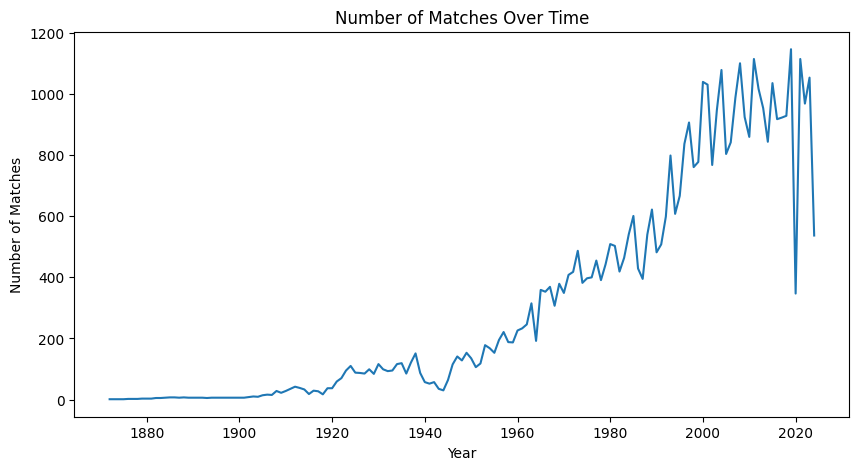

In [123]:
# Matches over time
res['date'] = pd.to_datetime(res['date'])  # Convert 'date' to datetime
matches_over_time = res.groupby(res['date'].dt.year).size()
plt.figure(figsize=(10, 5))
matches_over_time.plot(title='Number of Matches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

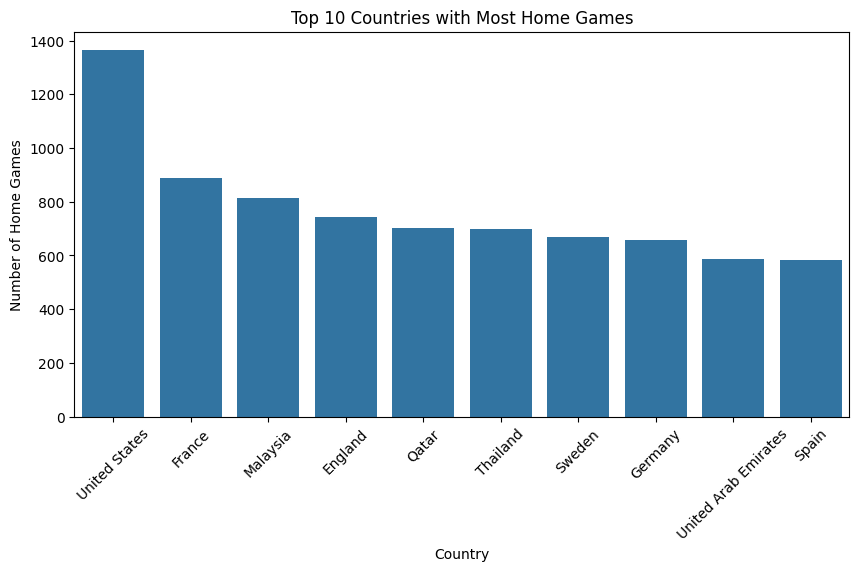

In [124]:
#Top countries with most home games
top_home_games = res['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_home_games.index, y=top_home_games.values)
plt.title('Top 10 Countries with Most Home Games')
plt.xlabel('Country')
plt.ylabel('Number of Home Games')
plt.xticks(rotation=45)
plt.show()

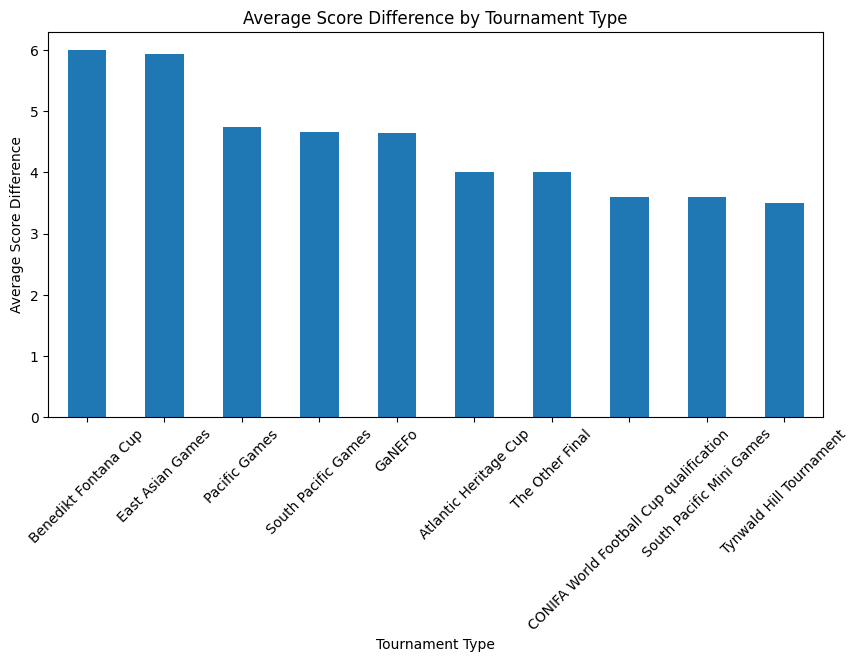

In [125]:
# Average score difference by tournament type
res['score_difference'] = abs(res['home_score'] - res['away_score'])
avg_score_diff_tournament = res.groupby('tournament')['score_difference'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
avg_score_diff_tournament.plot(kind='bar', title='Average Score Difference by Tournament Type')
plt.xlabel('Tournament Type')
plt.ylabel('Average Score Difference')
plt.xticks(rotation=45)
plt.show()

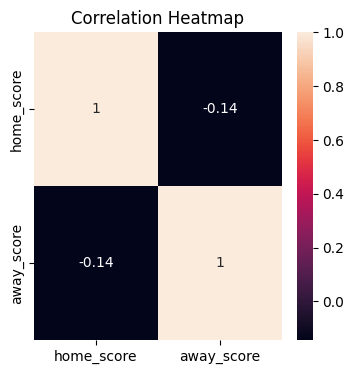

In [126]:
# Correlation heatmap
corr = res[['home_score', 'away_score']].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

##### Exploring Relationship between home_team and home_score, away_score for understanding winning probabilities

In [127]:
#Add a column for match outcome from the perspective of the home team
res['home_outcome'] = res.apply(lambda row: 'win' if row['home_score'] > row['away_score'] else ('loss' if row['home_score'] < row['away_score'] else 'draw'), axis=1)

In [128]:
# Probability of home team winning
home_win_probability = res['home_outcome'].value_counts(normalize=True)['win']
print(f"Probability of Home Team Winning: {home_win_probability:.2%}")

Probability of Home Team Winning: 49.09%


In [129]:
# Home advantage analysis: Average home score vs. away score
avg_home_score = res['home_score'].mean()
avg_away_score = res['away_score'].mean()
print(f"Average Home Score: {avg_home_score}")
print(f"Average Away Score: {avg_away_score}")

Average Home Score: 1.7608267924767806
Average Away Score: 1.1834895381555843


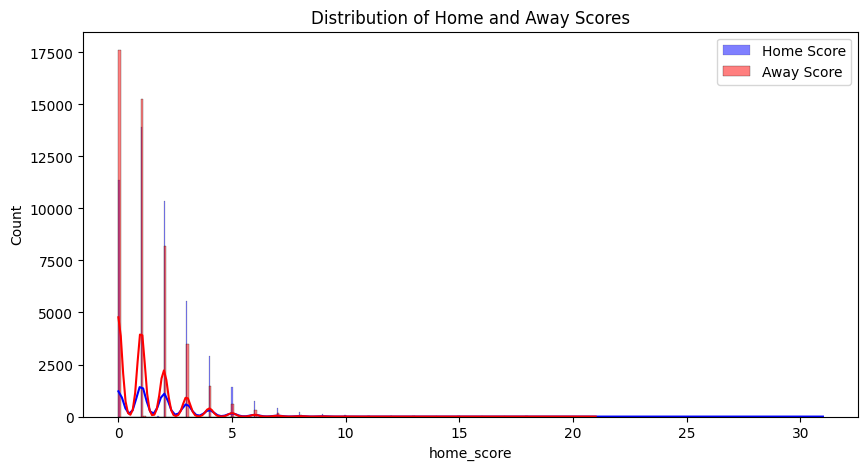

In [130]:
# Visualize the distribution of home and away scores
plt.figure(figsize=(10, 5))
sns.histplot(res['home_score'], color='blue', label='Home Score', kde=True)
sns.histplot(res['away_score'], color='red', label='Away Score', kde=True)
plt.title('Distribution of Home and Away Scores')
plt.legend()
plt.show()

In [131]:
# Teams with the highest average home score
top_home_scoring_teams = res.groupby('home_team')['home_score'].mean().sort_values(ascending=False).head(10)
print("Teams with Highest Average Home Score:")
print(top_home_scoring_teams)

Teams with Highest Average Home Score:
home_team
Parishes of Jersey    5.500000
Elba Island           5.000000
Hmong                 5.000000
Cascadia              5.000000
Gozo                  4.600000
Franconia             4.000000
Yorkshire             3.800000
Sápmi                 3.789474
North Vietnam         3.600000
Panjab                3.571429
Name: home_score, dtype: float64


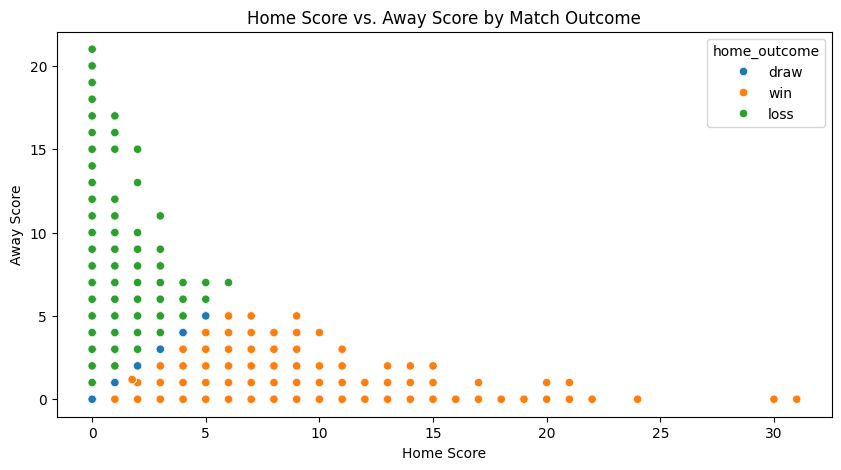

In [132]:
# Visualize the relationship between home score and away score
plt.figure(figsize=(10, 5))
sns.scatterplot(x='home_score', y='away_score', data=res, hue='home_outcome')
plt.title('Home Score vs. Away Score by Match Outcome')
plt.xlabel('Home Score')
plt.ylabel('Away Score')
plt.show()

In [133]:
# Explore which teams have the best win rate at home
home_win_rates = res[res['home_outcome'] == 'win'].groupby('home_team').size() / res.groupby('home_team').size()
top_home_win_rates = home_win_rates.sort_values(ascending=False).head(10)
print("Teams with Highest Home Win Rates:")
print(top_home_win_rates)

Teams with Highest Home Win Rates:
home_team
Hmong                 1.0
Western Australia     1.0
Luhansk PR            1.0
Franconia             1.0
Elba Island           1.0
Parishes of Jersey    1.0
Chameria              1.0
Cascadia              1.0
Central Spain         1.0
Yorkshire             0.8
dtype: float64


#### Performace Trends for Top Teams over time

To examine the performance trends over time for top teams, we first need to define ‘top teams’. 
Let’s consider ‘top teams’ as those with the highest win rates at home.

In [134]:
# Filter the DataFrame to include only matches involving top teams at home
top_teams = home_win_rates.sort_values(ascending=False).head(12).index.tolist()
top_teams_df = res[res['home_team'].isin(top_teams)]
top_teams_df


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_difference,home_outcome
818,1923-11-25,Central Spain,Galicia,1.0,0.0,Friendly,Madrid,Spain,False,1.0,win
7376,1968-08-15,Western Australia,Taiwan,3.0,2.0,Merdeka Tournament,Ipoh,Malaysia,True,1.0,win
20807,1996-02-06,Canary Islands,Venezuela,5.0,1.0,Friendly,Las Palmas,Spain,False,4.0,win
23239,1998-12-22,Canary Islands,Latvia,4.0,0.0,Friendly,Las Palmas,Spain,False,4.0,win
26364,2002-05-17,Canary Islands,Venezuela,0.0,2.0,Friendly,Las Palmas,Spain,False,2.0,loss
31518,2007-12-29,Canary Islands,Angola,2.0,0.0,Friendly,Las Palmas,Spain,False,2.0,win
37585,2014-04-06,Ellan Vannin,Monaco,10.0,0.0,Friendly,Douglas,Isle of Man,False,10.0,win
37670,2014-05-29,Franconia,Raetia,4.0,2.0,Friendly,Lohr am Main,Germany,False,2.0,win
37719,2014-06-01,Ellan Vannin,Artsakh,3.0,2.0,CONIFA World Football Cup,Östersund,Sweden,True,1.0,win
37724,2014-06-02,Ellan Vannin,County of Nice,4.0,2.0,CONIFA World Football Cup,Östersund,Sweden,True,2.0,win


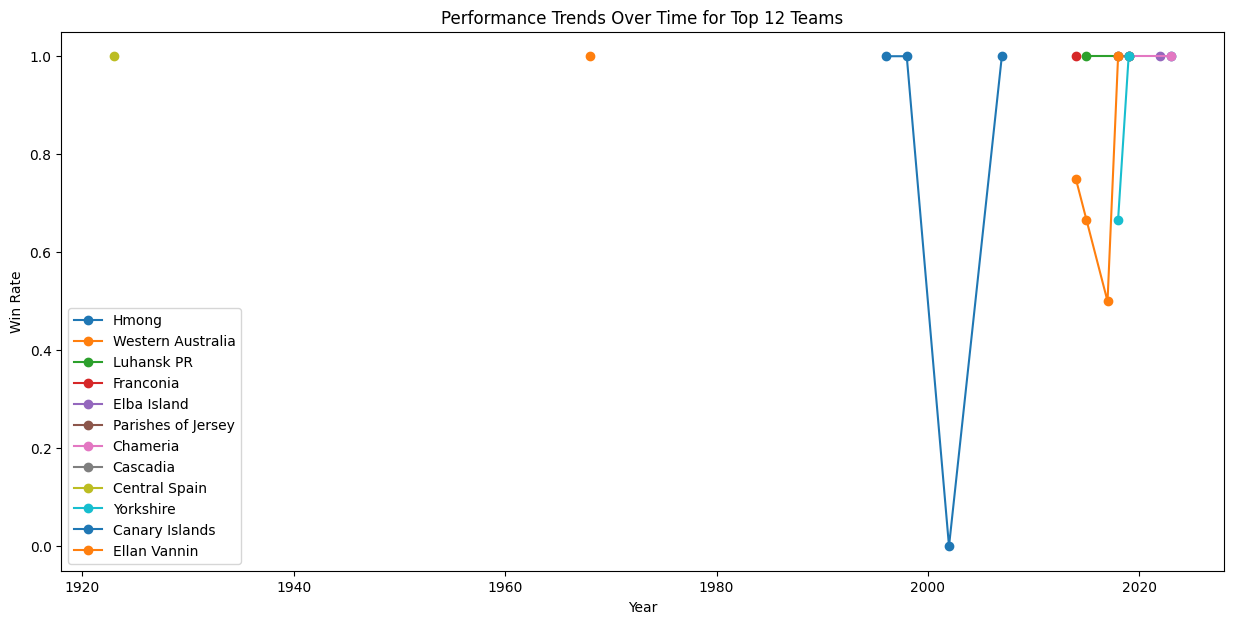

In [135]:
#Plot performance trends over time for each top team
plt.figure(figsize=(15, 7))
for team in top_teams:
    # Filter to get data for each top team
    team_data = top_teams_df[top_teams_df['home_team'] == team]
    # Group by year and calculate win rate for each year
    yearly_win_rate = team_data.groupby(team_data['date'].dt.year)['home_outcome'].apply(lambda x: (x == 'win').sum() / len(x))
    plt.plot(yearly_win_rate.index, yearly_win_rate.values, marker='o', label=team)

plt.title('Performance Trends Over Time for Top 12 Teams')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.legend()
plt.show()

#### Comparing Win rates in different Tournments and Countries

To compare win rates in different tournaments or cities, we’ll calculate the win rate for each tournament type and city, then visualize the results

In [136]:
# Calculate win rates for each tournament type
tournament_win_rates = res[res['home_outcome'] == 'win'].groupby('tournament').size() / res.groupby('tournament').size()
tournament_win_rates = tournament_win_rates.sort_values(ascending=False).head(20)

In [137]:
# Calculate win rates for each city
city_win_rates = res[res['home_outcome'] == 'win'].groupby('country').size() / res.groupby('country').size()
city_win_rates = city_win_rates.sort_values(ascending=False).head(20)

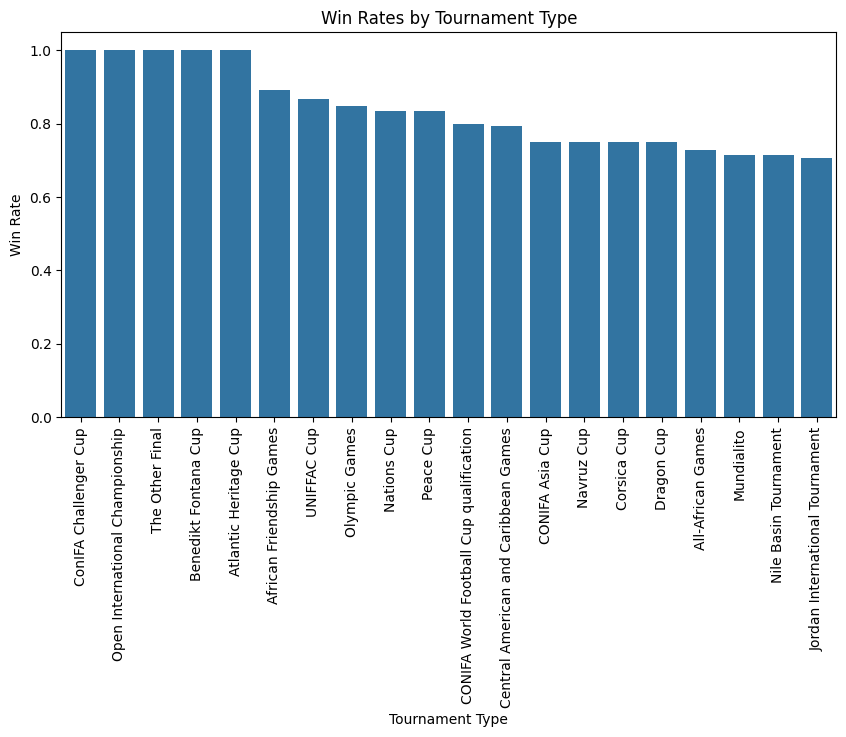

In [138]:
# Visualize win rates by tournament type
plt.figure(figsize=(10, 5))
sns.barplot(x=tournament_win_rates.index, y=tournament_win_rates.values)
plt.title('Win Rates by Tournament Type')
plt.xlabel('Tournament Type')
plt.ylabel('Win Rate')
plt.xticks(rotation=90)
plt.show()

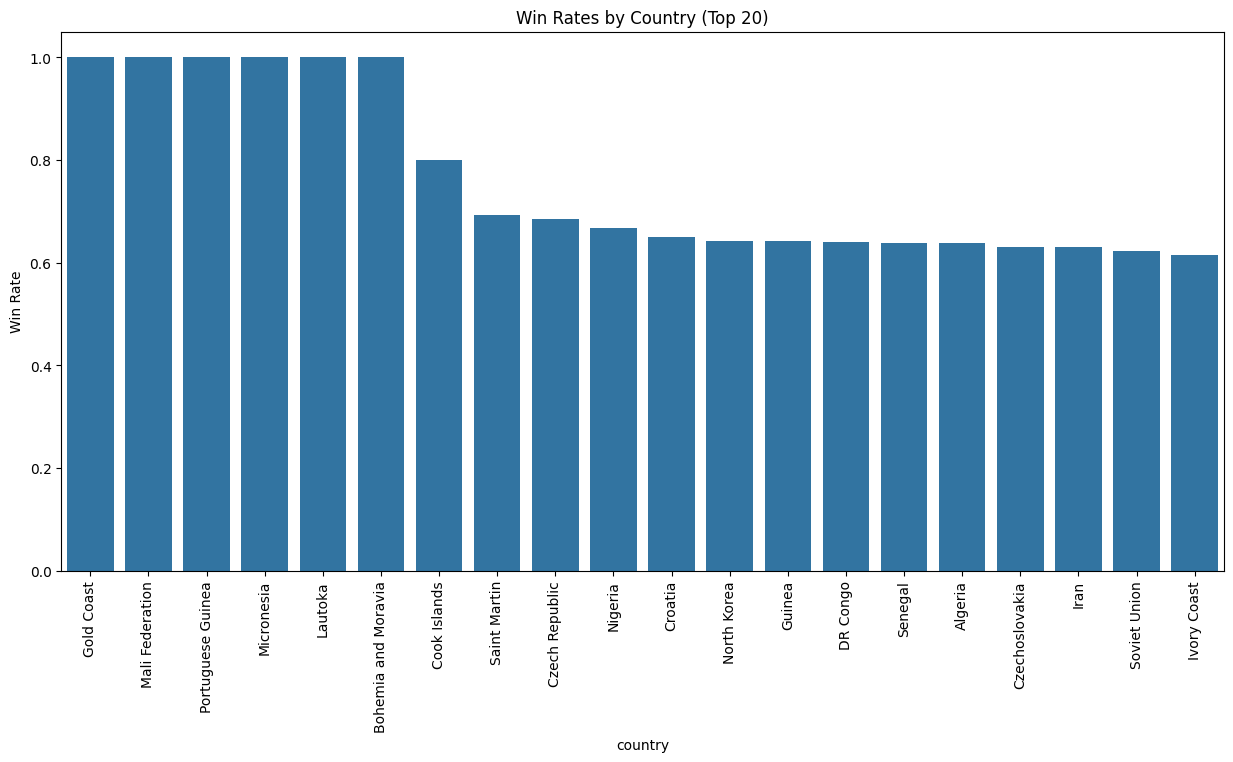

In [139]:
# Visualize win rates by city (top 20 country)
plt.figure(figsize=(15, 7))
top_cities = city_win_rates.head(20).index
sns.barplot(x=top_cities, y=city_win_rates.head(20).values)
plt.title('Win Rates by Country (Top 20)')
plt.xlabel('country')
plt.ylabel('Win Rate')
plt.xticks(rotation=90)
plt.show()

## International Results-Goalscorers Dataset

In [140]:
goals=pd.read_csv(r"C:\Users\yedla\Desktop\Omdena\1.UEFA_24\TunisiaLocalChapter_UEFAEURO2024\Datasets\international_results-master\international_results-master\goalscorers.csv")
goals.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [141]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44129 entries, 0 to 44128
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44129 non-null  object 
 1   home_team  44129 non-null  object 
 2   away_team  44129 non-null  object 
 3   team       44129 non-null  object 
 4   scorer     44080 non-null  object 
 5   minute     43870 non-null  float64
 6   own_goal   44129 non-null  bool   
 7   penalty    44129 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [142]:
goals['minute']=goals['minute'].fillna(goals['minute'].mean())


In [143]:
goals.dropna(inplace=True)
goals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44080 entries, 0 to 44128
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44080 non-null  object 
 1   home_team  44080 non-null  object 
 2   away_team  44080 non-null  object 
 3   team       44080 non-null  object 
 4   scorer     44080 non-null  object 
 5   minute     44080 non-null  float64
 6   own_goal   44080 non-null  bool   
 7   penalty    44080 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.4+ MB


<Axes: title={'center': 'Goals Over Time'}, xlabel='date'>

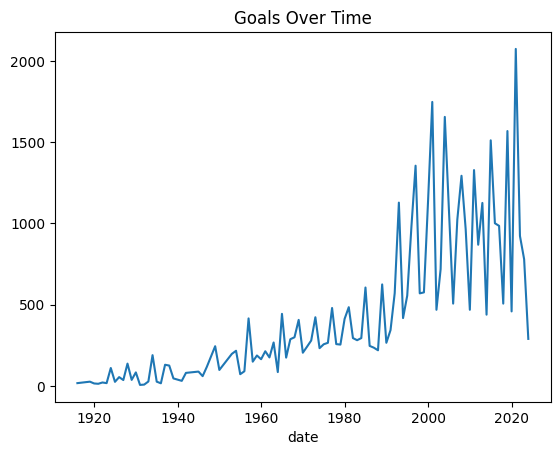

In [144]:
#Goals Over Time: Analyzing how the number of goals has changed over time.
goals['date'] = pd.to_datetime(goals['date'])
goals_over_time = goals.groupby(goals['date'].dt.year).size()
goals_over_time.plot(kind='line', title='Goals Over Time')


In [145]:
#Most Common Goal Minutes: Finding out which minutes of the game with most goals
common_goal_minutes = goals['minute'].value_counts().head(10)
print("Most Common Goal Minutes:")
print(common_goal_minutes)


Most Common Goal Minutes:
minute
90.0    1776
45.0     914
89.0     686
75.0     613
88.0     610
85.0     609
65.0     586
80.0     582
55.0     575
60.0     556
Name: count, dtype: int64


In [146]:
#Own Goals vs. Regular Goals: Lets Compare the frequency of own goals to regular goals
own_goals = goals['own_goal'].value_counts(normalize=True)
print("Percentage of Own Goals vs Regular Goals:")
print(own_goals)


Percentage of Own Goals vs Regular Goals:
own_goal
False    0.98167
True     0.01833
Name: proportion, dtype: float64


In [147]:
#Penalty Goals: deterimining how many goals were scored from penalties.
penalty_goals = goals[goals['penalty'] == True]['scorer'].value_counts()
print("Penalty Goals:")
print(penalty_goals)


Penalty Goals:
scorer
Harry Kane              19
Cristiano Ronaldo       19
Lionel Messi            14
Hristo Stoichkov        13
Robert Lewandowski      12
                        ..
Mohammad Al-Shalhoub     1
Ivica Šurjak             1
Włodzimierz Mazur        1
Gabriel Urdaneta         1
Anastasios Bakasetas     1
Name: count, Length: 1710, dtype: int64


In [148]:
#Team Performance: Evaluating which teams have the best performance in terms of scoring.
team_performance = goals.groupby('team').size().sort_values(ascending=False)
print("Team Performance by Goals Scored:")
print(team_performance)


Team Performance by Goals Scored:
team
Brazil           1046
Germany           963
Argentina         939
Spain             879
Mexico            851
                 ... 
Yemen DPR           4
Somalia             3
French Guiana       2
Anguilla            2
South Sudan         2
Length: 220, dtype: int64


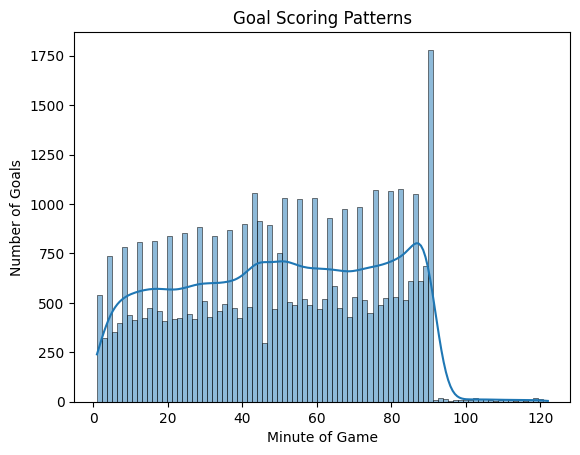

In [149]:
#Goal Scoring Patterns: Looking for patterns , when goals are scored during a match.
sns.histplot(data=goals, x='minute', bins=90, kde=True)
plt.title('Goal Scoring Patterns')
plt.xlabel('Minute of Game')
plt.ylabel('Number of Goals')
plt.show()


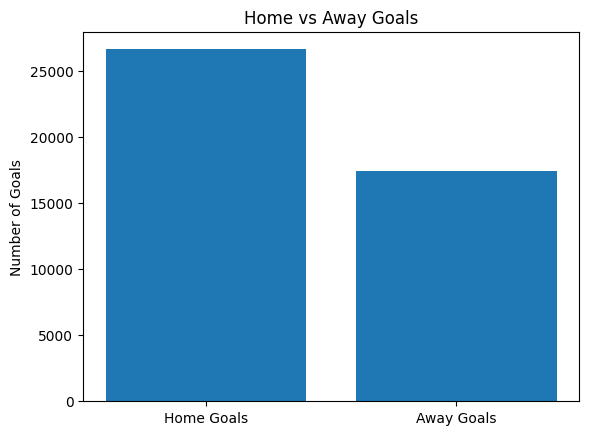

In [150]:
#Home vs Away_team goals
home_goals = goals[goals['team'] == goals['home_team']]['scorer'].count()
away_goals = goals[goals['team'] == goals['away_team']]['scorer'].count()

plt.bar(['Home Goals', 'Away Goals'], [home_goals, away_goals])
plt.title('Home vs Away Goals')
plt.ylabel('Number of Goals')
plt.show()


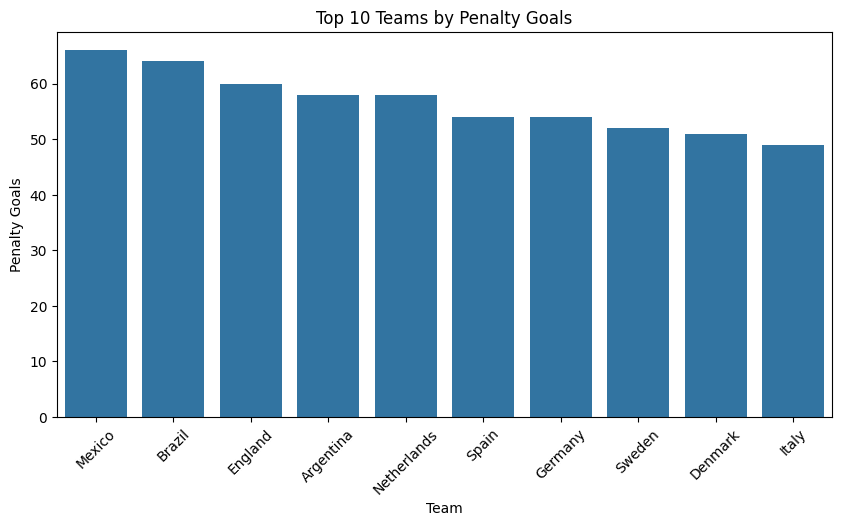

In [151]:
#Penalty Goals by Team: Visualize which teams have scored the most penalty goals.
penalty_goals_by_team = goals[goals['penalty'] == True].groupby('team').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=penalty_goals_by_team.index, y=penalty_goals_by_team.values)
plt.title('Top 10 Teams by Penalty Goals')
plt.xlabel('Team')
plt.ylabel('Penalty Goals')
plt.xticks(rotation=45)
plt.show()


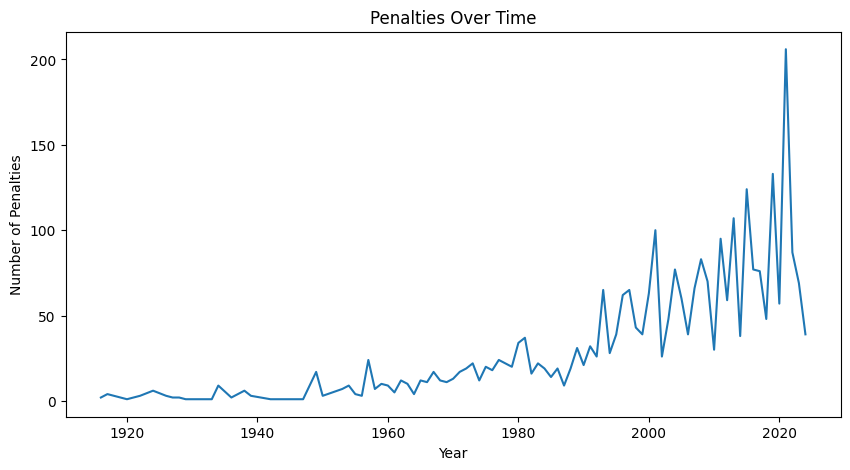

In [152]:
#Penalties Over Time: Plot the trend of penalties given over time.
penalties_over_time = goals[goals['penalty'] == True].groupby(goals['date'].dt.year).size()

plt.figure(figsize=(10, 5))
penalties_over_time.plot(kind='line', title='Penalties Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Penalties')
plt.show()


C:\Users\yedla\AppData\Local\Temp\ipykernel_22652\3707320916.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=goals[goals['team'] == goals['home_team']], x='minute', label='Home Team Goals', shade=True)
C:\Users\yedla\AppData\Local\Temp\ipykernel_22652\3707320916.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=goals[goals['team'] == goals['away_team']], x='minute', label='Away Team Goals', shade=True)


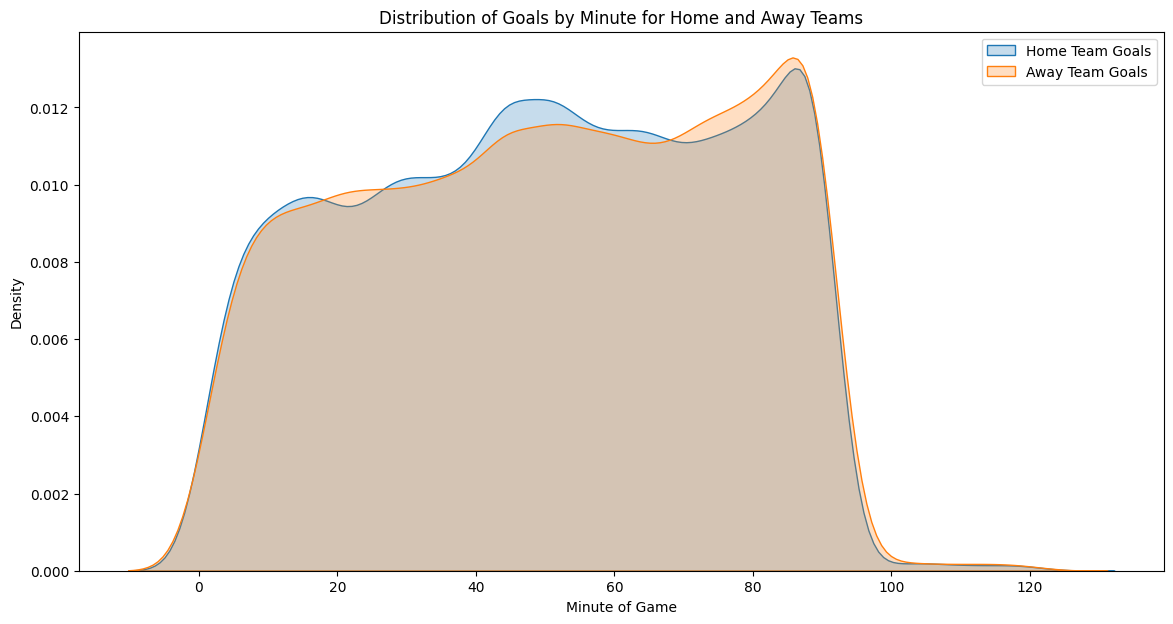

In [153]:
# Distribution of Goals by Minute for Home and Away Teams
plt.figure(figsize=(14, 7))
sns.kdeplot(data=goals[goals['team'] == goals['home_team']], x='minute', label='Home Team Goals', shade=True)
sns.kdeplot(data=goals[goals['team'] == goals['away_team']], x='minute', label='Away Team Goals', shade=True)
plt.title('Distribution of Goals by Minute for Home and Away Teams')
plt.xlabel('Minute of Game')
plt.ylabel('Density')
plt.legend()
plt.show()


## International Results- Shootouts Dataset

In [154]:
shootout=pd.read_csv(r"C:\Users\yedla\Desktop\Omdena\1.UEFA_24\TunisiaLocalChapter_UEFAEURO2024\Datasets\international_results-master\international_results-master\shootouts.csv")
shootout.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [155]:
shootout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           637 non-null    object
 1   home_team      637 non-null    object
 2   away_team      637 non-null    object
 3   winner         637 non-null    object
 4   first_shooter  223 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB


In [156]:
shootout['first_shooter'].nunique()

85

In [157]:
# Most Successful Teams in Shootouts
successful_teams = shootout['winner'].value_counts().head(10)
print("Most Successful Teams in Shootouts:")
print(successful_teams)


Most Successful Teams in Shootouts:
winner
South Korea     15
Egypt           14
Zambia          14
Argentina       14
Thailand        13
South Africa    13
Iraq            11
Senegal         11
Indonesia       10
Ivory Coast     10
Name: count, dtype: int64


In [ ]:
# Impact of First Shooter:
first_shooter_wins = shootout[shootout['first_shooter'] == shootout['winner']].shape[0]
total_shootouts = shootout.shape[0]

print(f"Percentage of times the first shooter wins: {first_shooter_wins / total_shootouts:.2%}")


Percentage of times the first shooter wins: 18.84%


In [163]:
top_countries = shootout['winner'].value_counts().head(20).index

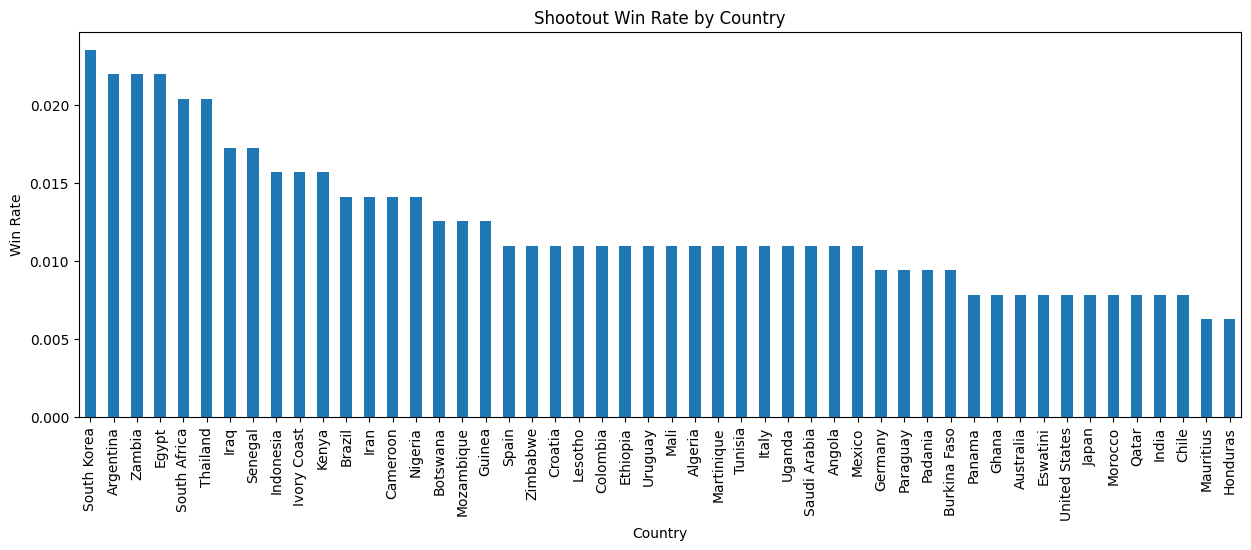

In [164]:
# Shootout Win Rate by Country (Bar Plot)
win_rate_by_country = shootout.groupby('winner').size().sort_values(ascending=False).head(50) / total_shootouts

plt.figure(figsize=(15, 5))
win_rate_by_country.plot(kind='bar')
plt.title('Shootout Win Rate by Country')
plt.xlabel('Country')
plt.ylabel('Win Rate')
plt.xticks(rotation=90)
plt.show()
